# August

## 29th

### (E) 572. Subtree of Another Tree ★

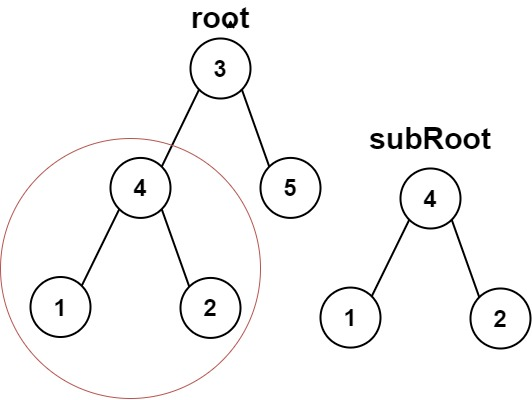

In [58]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
root = TreeNode(3)
root.right = TreeNode(5)
root.left = TreeNode(4)
root.left.right = TreeNode(2)
root.left.left = TreeNode(1)
#root.left.right.left = TreeNode(0)

subRoot = TreeNode(4)
subRoot.right = TreeNode(2)
subRoot.left = TreeNode(1)

I came up with the same idea but this is much faster - from LeetCode discussion - 100 / 35

In [59]:
class Solution(object):
    def isSubtree(self, s, t):
        """
        :type s: TreeNode
        :type t: TreeNode
        :rtype: bool
        """
        def convert(p):
            return "^" + str(p.val) + "#" + convert(p.left) + convert(p.right) if p else "$"
        
        print(convert(t))
        print(convert(s))
        return convert(t) in convert(s)
    
Solution().isSubtree(root, subRoot)

^4#^1#$$^2#$$
^3#^4#^1#$$^2#$$^5#$$


True

### (E) 628. Maximum Product of Three Numbers

First approach : pick the largest list among the combinations of three elements

Using heapq - time limit exceeded

In [18]:
nums = [1,2,3,4]
from typing import List
import heapq

class Solution:
    def maximumProduct(self, nums: List[int]) -> int:
        self.res = []
        
        def threeCombi(arr, mul, cnt):
            if cnt == 3:
                heapq.heappush(self.res, -mul)
                return
            
            for idx in range(len(arr)):
                threeCombi(arr[idx+1:], mul * arr[idx], cnt + 1)
                
        threeCombi(sorted(nums), 1, 0)
        return -heapq.heappop(self.res)
    
Solution().maximumProduct(nums)

24

Not using heapq - ime limit exceeded

In [14]:
nums = [1,2,3,4]
from typing import List

class Solution:
    def maximumProduct(self, nums: List[int]) -> int:
        self.res = []
        
        def threeCombi(arr, mul, cnt):
            if cnt == 3:
                self.res.append(mul)
                return
            
            for idx in range(len(arr)):
                threeCombi(arr[idx+1:], mul * arr[idx], cnt + 1)
                
        threeCombi(sorted(nums), 1, 0)
        return max(self.res)
    
Solution().maximumProduct(nums)

24

Second approach : compare the multiplication of three largest elements to the multiplication of the most largest element and two negative / smallest elements

90 / 67

In [ ]:
nums = [-1, -2, -3]
from typing import List
from functools import reduce

class Solution:
    def maximumProduct(self, nums: List[int]) -> int:
        
        nums = sorted(nums)

        return max(reduce(lambda x, y: x*y, [nums[-1]] + nums[:2]),
                reduce(lambda x, y: x*y, nums[-3:]))
    
Solution().maximumProduct(nums)

## 30th

### (M) 662. Maximum Width of Binary Tree ★★

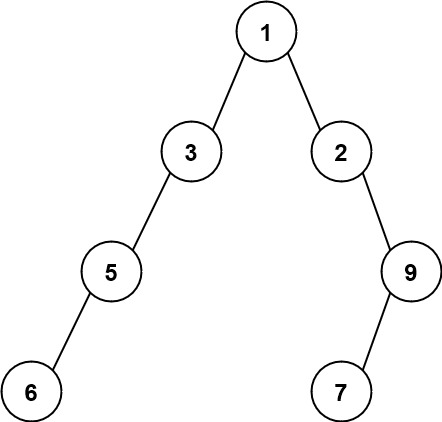

In [76]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
root = TreeNode(1)
root.left = TreeNode(3)
root.right = TreeNode(2)
root.left.left = TreeNode(5)
root.right.right = TreeNode(9)
#root.left.left.left = TreeNode(6)
#root.right.right.left = TreeNode(7)

What a dull solution - this assuming that there is Null nodes -> counting all the possible node positions - time limit exceeded

In [53]:
from typing import Optional

class Solution:
    def widthOfBinaryTree(self, root: Optional[TreeNode]) -> int:

        def bfs(root):

            if root == None: return 0

            queue = [root]
            maxCnt = 1

            parent = 1
            cnt_withoutNone = 0
            cnt_withNone = 0

            first, second = 0, 0

            while True:
                print(f"parent, cnt_withNone, cnt_withoutNode: {parent},{cnt_withNone}, {cnt_withoutNone}")
                node = queue.pop(0)
                parent -= 1 

                if node == None:
                    queue.append(None)
                    queue.append(None)
                    cnt_withNone += 2

                else: # node is not none

                    if node.left != None:
                        queue.append(node.left)
                        cnt_withNone += 1
                        cnt_withoutNone += 1

                        if first == 0:
                            first = cnt_withNone
                        else:
                            second = cnt_withNone

                    else:
                        queue.append(None)
                        cnt_withNone += 1
                        
                    if node.right != None:
                        print(f"first : {first}")
                        queue.append(node.right)
                        cnt_withNone += 1
                        cnt_withoutNone += 1

                        if first == 0:
                            first = cnt_withNone
                        else:
                            second = cnt_withNone


                    else:
                        queue.append(None)
                        cnt_withNone += 1

                if parent == 0:

                    if cnt_withoutNone == 0:
                        break

                    else:
                        print(f"{first}, {second}")
                        maxCnt = max(maxCnt, (second - first + 1))
                        first, second = 0, 0

                        parent = cnt_withNone
                        cnt_withoutNone = 0
                        cnt_withNone = 0

            return maxCnt
        return bfs(root)
Solution().widthOfBinaryTree(root)

parent, cnt_withNone, cnt_withoutNode: 1,0, 0


1

Cannot come up with any better solution than this - 74 / 100

In [79]:
from typing import Optional

class Solution:
    def widthOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        
        def bfs(root):
            if root == None: return 0
            
            nth, parent, child = 1, 1, 0
            queue = [(root, nth)] ### key idea ###
            first, second, maxCnt = 0, 0, 1
            
            while queue:
                node, nth = queue.pop(0) ### key idea ###
                parent -= 1
                
                if node.left != None:
                    queue.append( (node.left, nth * 2 - 1) )
                    child += 1
                        
                if node.right != None:
                    queue.append( (node.right, nth * 2) )
                    child += 1
                    
                if first == 0:
                    first = nth 
                else:
                    second = nth

                if parent == 0:
                    maxCnt = max(maxCnt, (second - first + 1))
                    parent = child
                    child = 0
                    first, second = 0, 0
                    
            return maxCnt
        return bfs(root)
Solution().widthOfBinaryTree(root)

4